In [1]:
# 합성곱 신경망 (Convolutional Neural Network, 이하 CNN)
# 아래 그림은 인공 신경망 (ANN) 에 대한 밀집층의 계산방식
# 완전 연결(Fully Connected) 방식

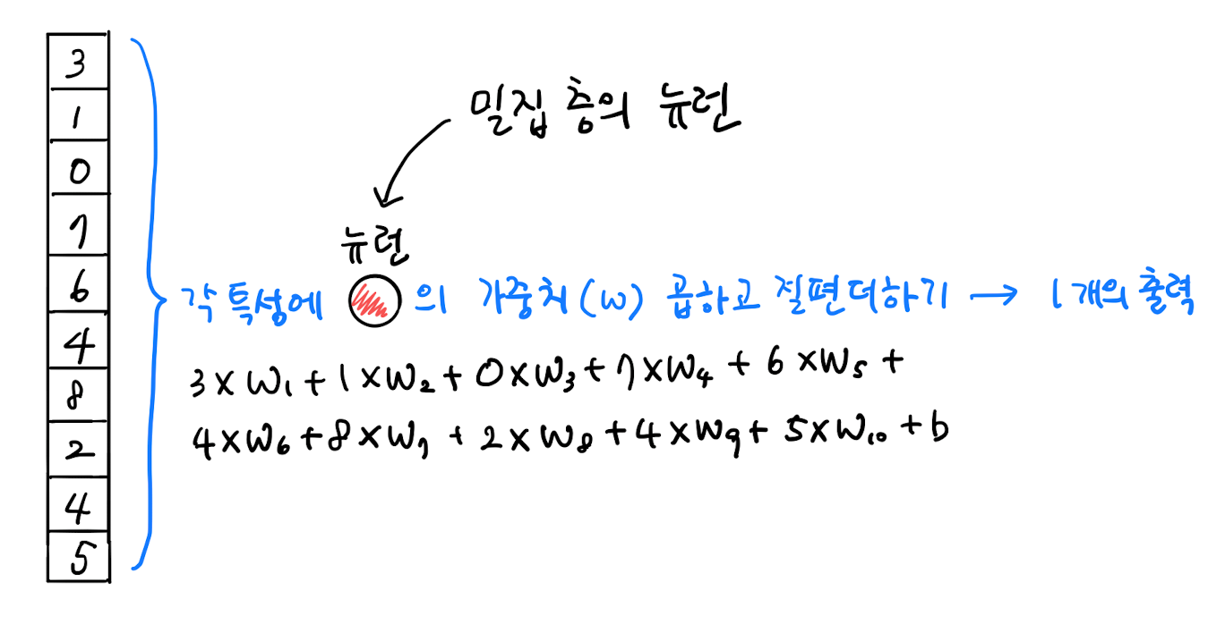

In [ ]:
# 합성곱은 입력 데이터 일부에 가중치를 곱한다
# 컨볼루션 레이어를 거쳐 특징 맵(feature map) 이 생성된 후, 이를 1차원 벡터로 변환(Flatten)하여 밀집층으로 전달
# 컨볼루션과 풀링을 거쳐 특징을 추출한 후 밀집층을 사용

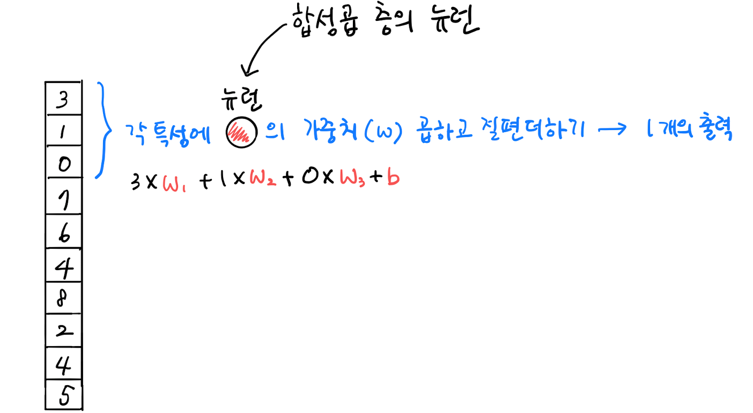

In [ ]:
# 3개씩 묶어서 1개의 출력 (반복)

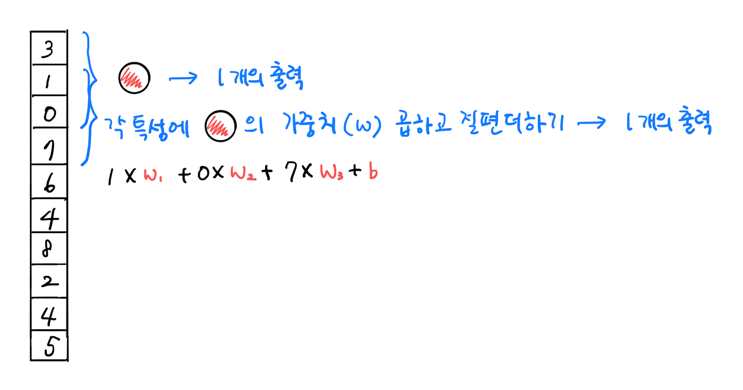

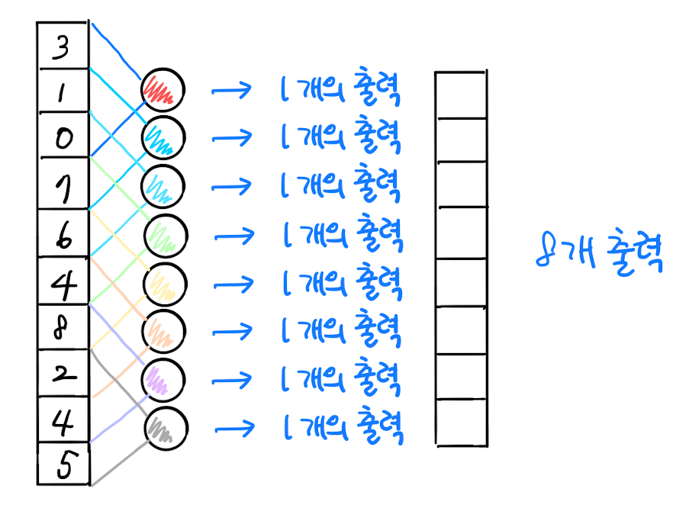

In [ ]:
# 합성곱 레이어의 역할은 주어진 이미지의 지역적 특성(feature)을 분석하여 확률로 리턴하는 역할

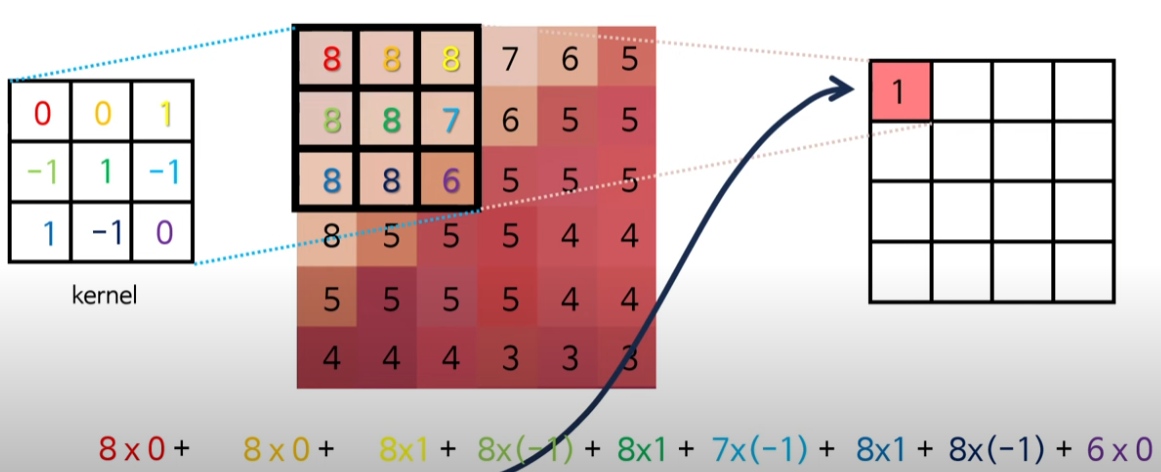

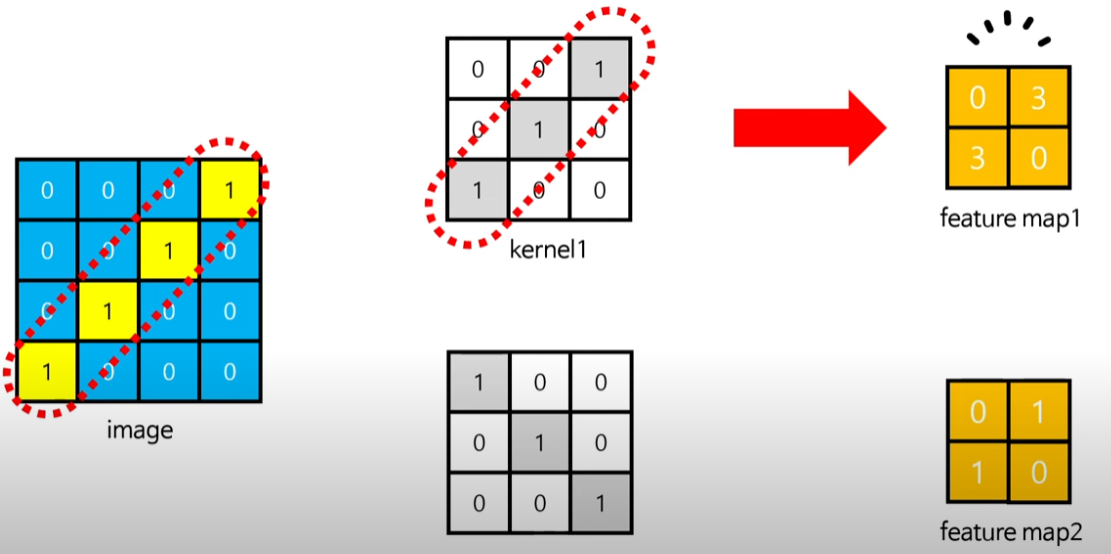

In [ ]:
# 10개의 배열이 8개의 합성곱 출력으로 생성됨.

# 밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만듬.
# 합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만듬
# 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름이다.(커스텀 - 하이퍼파라미터)
# 이 방법은 마치 도장을 찍는 방법처럼 생각하면 쉽다.

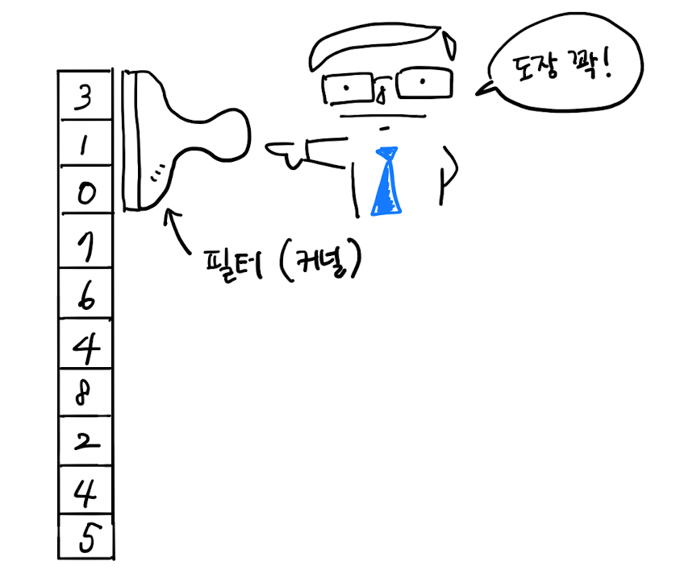

In [ ]:
# 경사하강법의 신경망 층은 뉴런이 길게 늘어서 있고 서로 조밀하게 연결되어 있었음.

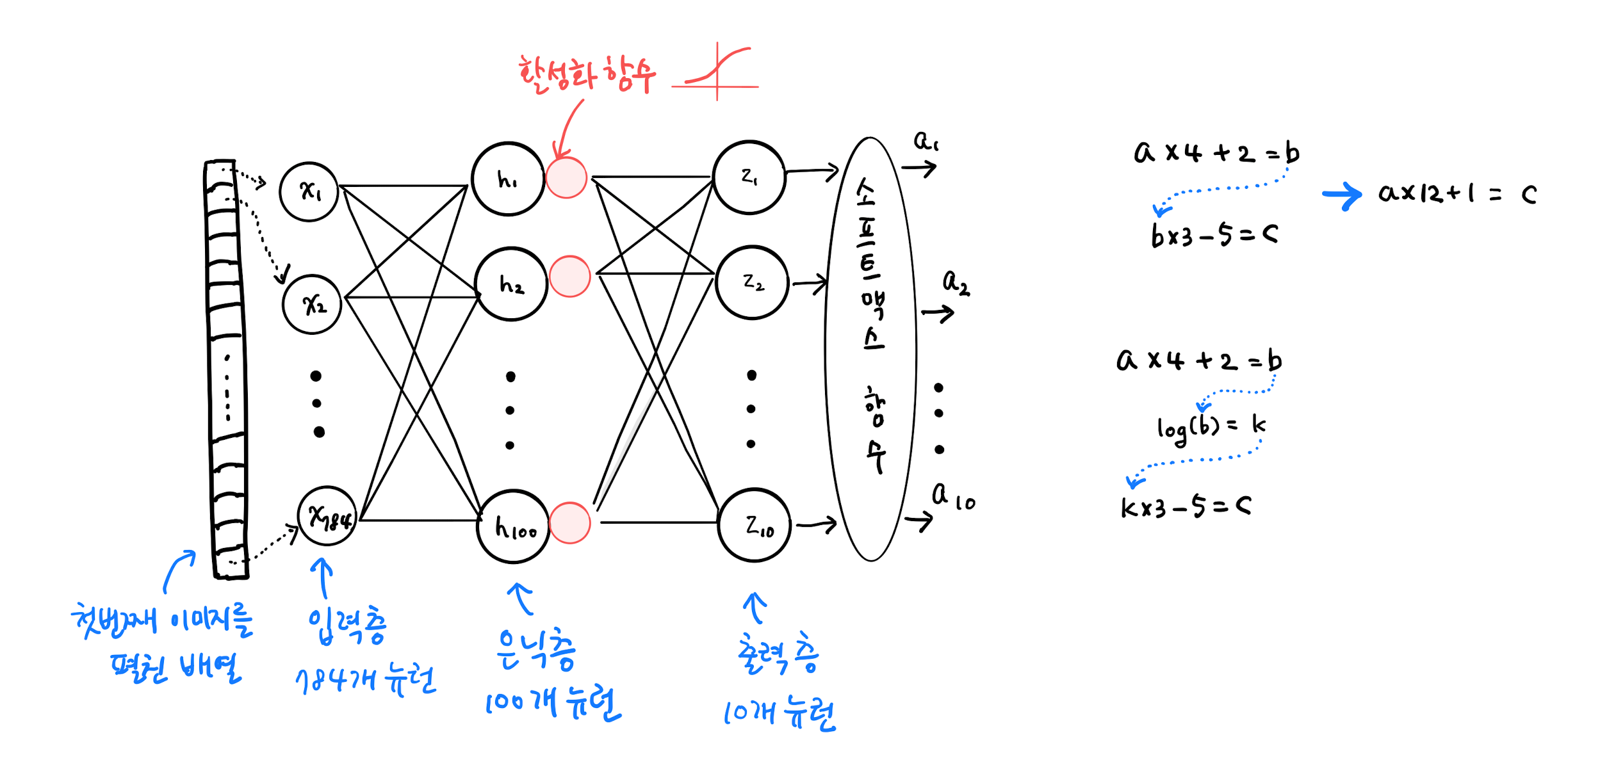

In [ ]:
# 그런데 합성곱에서의 뉴런은 입력 위를 이동하면서 출력을 만들기 때문에 위 그림처럼 표시가 힘듬.
# 이것을 뉴런이라고 부르기도 좀 애매함. -> 필터라고 부름(커널이라고도 함.)
# https://kr.mathworks.com/discovery/convolutional-neural-network.html?gclid=Cj0KCQiA0MG5BhD1ARIsAEcZtwQYUQnRVLKQ8-WwcDHni0Fi-fO7gt9oWBJy6lyW4hk7TOBMM55mIdEaAu8bEALw_wcB&ef_id=Cj0KCQiA0MG5BhD1ARIsAEcZtwQYUQnRVLKQ8-WwcDHni0Fi-fO7gt9oWBJy6lyW4hk7TOBMM55mIdEaAu8bEALw_wcB:G:s&s_kwcid=AL!8664!3!650716963097!p!!g!!convolutional%20neural%20network&s_eid=psn_136154680972&q=convolutional+neural+network&gad_source=1

# 케라스 API와 이름을 맞추어 뉴런 개수를 이야기할 때 필터 (뉴런 개수를 표현)
# 입력에 곱해지는 가중치를 의미할 때는 커널이라고 함 (입력에 곱하는 가중치)

# 합성곱의 장점은 1차원이 아니라, 2차원에도 적용

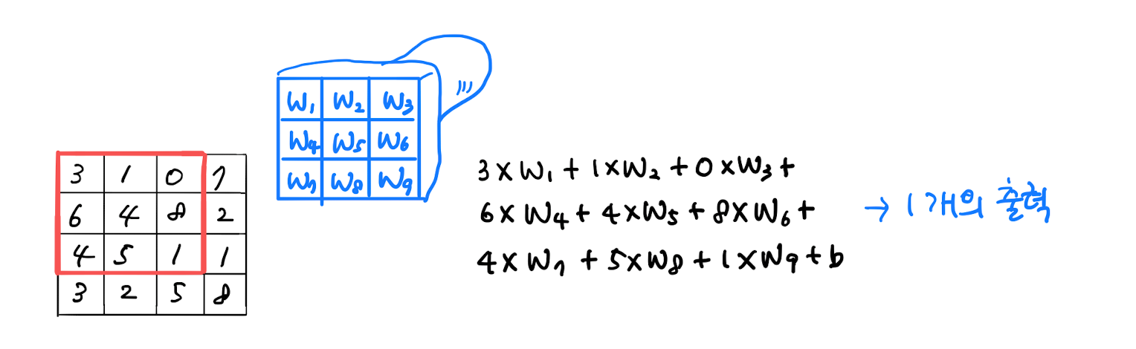

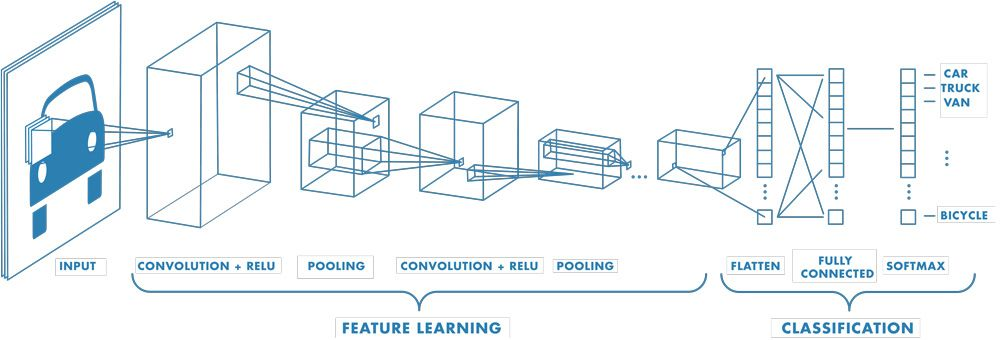

In [ ]:
# Convolution
# 필터(커널)를 사용하여 입력 행렬(이미지)에서 특징을 추출하는 연산
# Max Pooling
# 지정한 크기의 영역에서 최댓값을 선택하여 새로운 행렬을 만듬
# Average Pooling
# 지정한 크기의 영역에서 평균값을 계산하여 새로운 행렬을 만듬

# 일반적으로 컨볼루션 → 렐루(ReLU) 순서로 적용

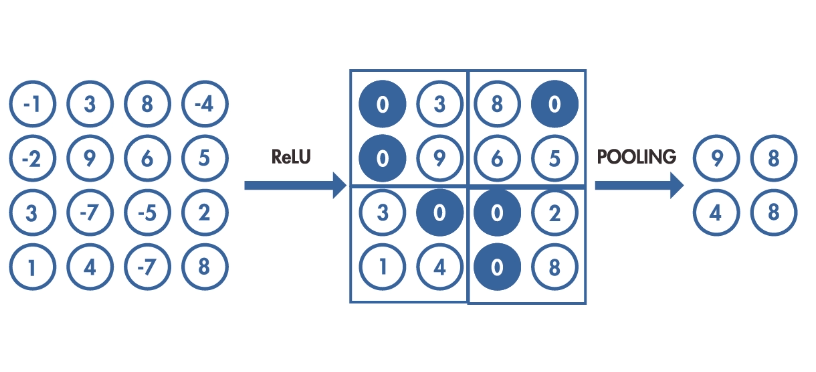

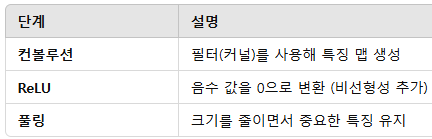

In [ ]:
# 위 그림을 보면 입력이 2차원 배열이면 필터(도장)도 2차원 이어야 함
# 위 그림에서 이 필터의 커널 크기는 3*3(하이퍼파라미터) 으로 가정하고
# 왼쪽 위 모서리부터 합성곱을 시작
# 입력의 9개 원소와 커널의 9개 가중치를 곱한 후 절편을 더하고 1개의 출력을 만듬

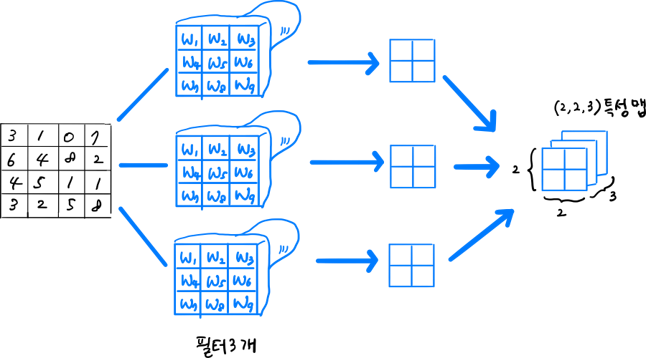

In [ ]:
# 밀집층에서 여러개의 뉴런을 사용하듯이 합성곱 층에서도
# 여러개 필터를 사용 하나만 사용할 이유가 없다.
# 여러개의 필터를 사용하면 만들어진 특성 맵은 순서대로 차곡 차곡 쌓인다.
# 3차원 배열 (2,2,3) 크기

# 이렇게 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이
# 이미지 처리 분야에서 뛰어난 성능을 발휘함

In [3]:
# 케라스 합성곱 층 테스트

# 케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있음(합성곱 층도 마찬가지임)
# 특별히 입력 위 (왼쪽에서 오른쪽으로, 위에서 아래도) 이동하는 합성곱은 Conv2D 클래스로 제공함

from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
#                   10 필터(즉 도장!)의 개수
#                       커널 사이즈(3*3)
#                                           활성화 함수(렐루)

# 특성맵은 활성화 함수 적용 후에 사용함
# 완전 연결 신경망에서처럼 합성곱 신경망에서도 종종 활성화 함수를 언급하지 않음
# 일반적으로 특성 맵은 활성화 함수를 통과한 값을 나타냄
# 합성곱에서는 활성화 출력이란 표현을 잘 쓰지 않음

# 커널의 크기는 하이퍼파라미터로 대부분 3*3 이나 5*5 크기가 권장됨
# 케라스 API의 합성곱 층은 Dense층을 사용했던 자리에 대신 Conv2D 층을 넣음

# 합성곱 신경망의 정의
# 일반적으로 1개이상의 합성곱 층을 쓴 인공신경망
# 즉, 합성곱 층만 사용한 신경망을 합성곱 신경망이라고 부르지 않음.

<Conv2D name=conv2d, built=False>

In [ ]:
# filters: 필터 개수
# kernel_size: 필터 크기 // 3x3 주로 사용, 작으면 더 넓은 영역을 학습하지만 계산량 증가
# strides: 필터 이동 크기 // 기본값 1, 이동 크기가 클수록 출력 크기가 작아짐 (다운샘플링 효과)
# padding: 출력 크기 조정 // 기본값 vaild, 출력크기가 작아짐
# activation: 활성화 함수

In [ ]:
# 패딩
# 아래 그림과 같이 (6,6) 크기이면 (3,3) 크기의 합성곱을 했을 때 출력의 크기는? -> (4,4)
# padding='same'
# 패딩이 없으면 출력의 크기는? -> (2,2)
# padding='valid' (기본값)

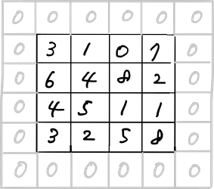

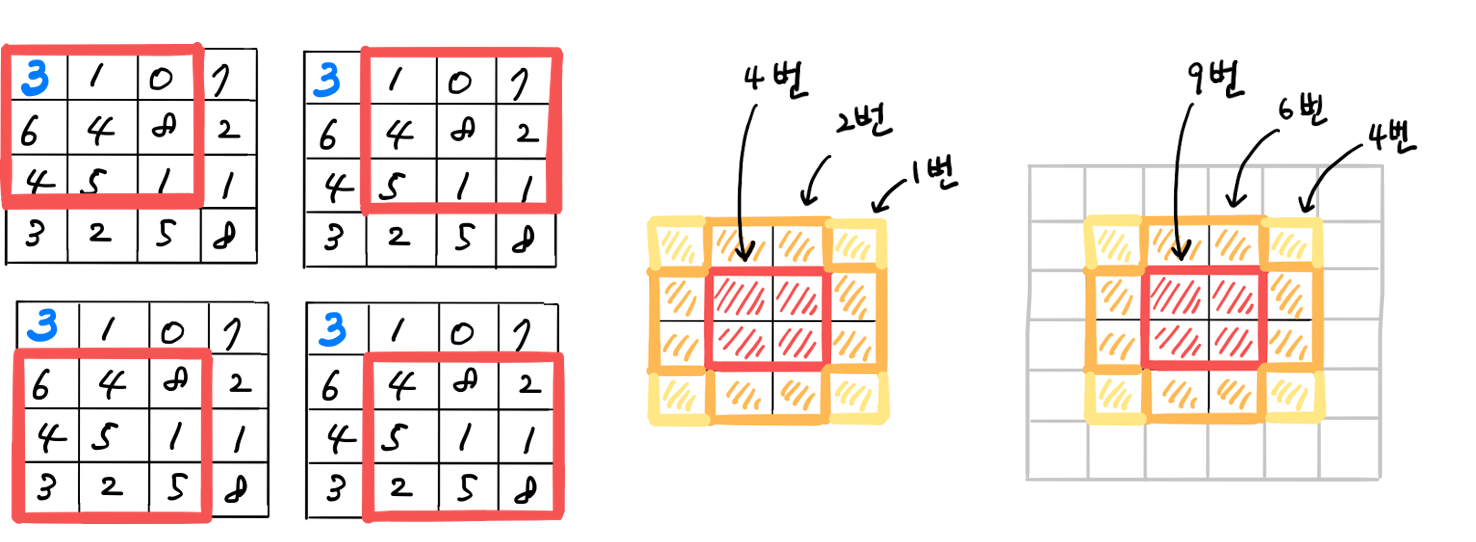

In [ ]:
# 패딩을 적용해도 모서리 부분이 중앙보다 반영되는 데이터가 적은 것은 피할 수 없음
# 하지만, 딥러닝 모델을 깊게 쌓거나 적절한 패딩 기법을 사용하면 그 영향을 줄일 수 있음
# CNN에서 3×3 필터를 주로 사용하는 이유도 이 문제를 최소화하기 위함!

#  Replication Padding (경계 픽셀을 복사)
#  Reflection Padding

In [ ]:
# 만약 2픽셀을 패딩하면 중앙부와 모서리 픽셀이 합성곱에 참여하면 (1:1) 비율로 동일 해짐.
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

In [ ]:
# 스트라이드(stride) : 합성곱 연산은 좌우, 위아래 한칸씩이 기본값이지만
# 두칸씩 이동할 수도 있는 방법(특성맵의 크기가 작아짐)
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

In [ ]:
# 풀링(pooling) : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행
#   -> 하지만 특성맵의 개수는 줄이지 않음
# 겹침 없이 이동
# 풀링은 특성 맵에 커널 없는 필터를 적용하는 것과 비슷하게 생각할 것

# 예를 들면 (2,2,3) 크기의 특성 맵에 풀링을 적용하면
# 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1,1,3) 크기의 특성 맵이 됨

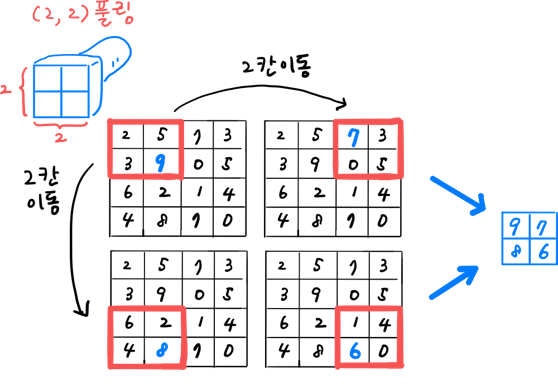

In [ ]:
# MaxPooling2D 에 padding 이라는 옵션의 기본값은 "valid"이며, 이 경우 끝에 남는 모서리 부분이 pool_size 와 맞지 않을 경우 그냥 무시함 (5x5 -> 2x2)
# padding 값을 "same" 으로 설정하면, zero padding 을 추가하여 사이즈를 맞춘 뒤 처리 (5x5 -> 3x3)

In [5]:
keras.layers.MaxPooling2D(2) # 대부분 풀링의 크기는 2 (가로 세로 크기를 절반으로 줄임)

# 합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공함
# strides의 기본값은 자동으로 풀링의 크기이므로 따로 지정 하지 않음
# padding의 기본값은 valid로 패딩을 하지 않음

keras.layers.MaxPooling2D(2, strides=2, padding="same") # 최대 풀링 코드

keras.layers.AveragePooling2D(2, strides=2, padding="valid") # 평균 풀링 코드

# 대부분 최대 풀링을 많이 사용한다.
# 평균풀링은 특성 맵에 있는 중요한 정보를 평균을 내어 희석시킬 수 있기 때문

# keypoint : 풀링은 가로 세로 방향만 진행한다.(특성 맵의 개수는 변하지 않고 그대로)

<AveragePooling2D name=average_pooling2d, built=True>

In [ ]:
# 합성곱 신경망의 전체 구조

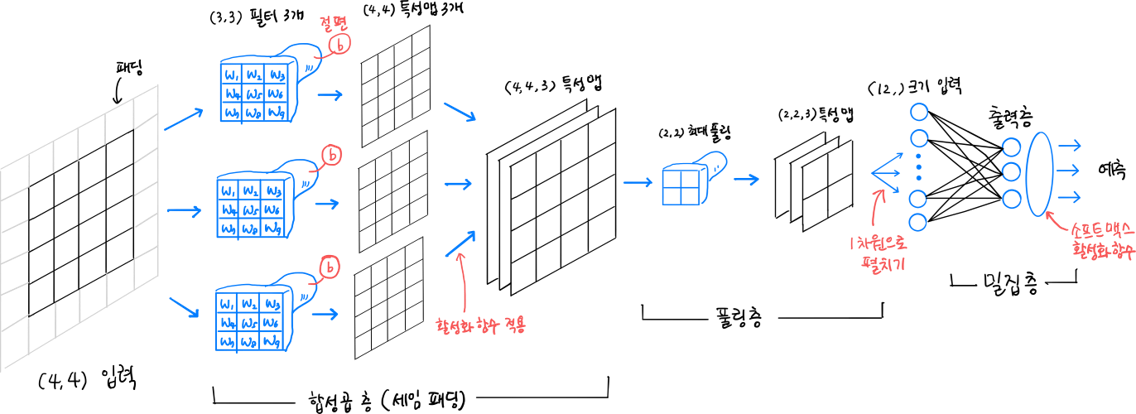

In [ ]:
# 1. (4,4) 입력값에 패딩 1을 적용
# 2. 합성곱 에서 사용할 커널의 크기는 (3,3) 크기이고 세임 패딩이 1이므로 1픽셀이 입력 데이터 주변에 추가
# 3. 이때 패딩은 텐서 플로에서 자동으로 추가하므로 수동으로 입력에 어떤 작업을 추가할 필요가 없음
# 4. 패딩이 추가된 입력에서 합성곱이 수행됨

# 5. 합성곱의 필터는 3개임 (각각 3,3 크기의 가중치를 가지고 있으며 필터마다 절편이 하나씩 있음)
# 6. 밀집층의 뉴런과 마찬가지로 필터의 가중치는 각기 서로 다름, 합성곱의 스트라이드는 항상 1
# 7. 만들어지는 특성 맵의 크기는 입력과 동일한 (4,4), 3개의 필터가 하나씩 합성곱의 출력을 만들고
#    이 출력이 합쳐져서 (4,4,3)크기의 특성맵 생성
# 8. 밀집층과 마찬가지로 합성곱 층에서도 활성화 함수를 적용함(합성곱의 활성화 함수로 렐루사용)

# 9. 풀링층은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄입
# 10. 보통 (2,2) 풀링을 사용해서 절반으로 줄임 (특성 맵의 개수는 변하지 않음 (2,2,3))
# 10-1. 풀링을 사용함년 합성곱에서 스트라이드를 크게하여 특성 맵을 줄이는 것보다
#       풀링 층에서 크기를 줄이는 것이 더 나은 성능임

# 11. 밀집층인 출력층에서 전달하려면 3차원 배열을 1차원 배열로 펼쳐야 함(Flatten 클래스)
#     -> 12개의 원소를 가진 1차원 배열이고 출력층의 입력이 됨
# 12. 3개의 뉴런을 두었고 (3개의 클래스를 분류하는 다중분류
#     -> 출력층에서 계산된 값은 소프트맥스 활성화 함수를 거침) -> 최종 예측 확률이 됨


In [ ]:
# 컬러인 경우에는 RGB(빨,녹,파)채널로 구현되어 있음
# 하나의 컬러 이미지는 너비와 높이 차원 이외에 깊이 차원(채널 차원)이 있다. (4,4,3)이 되는 것!
# -> 마지막 3이 깊이

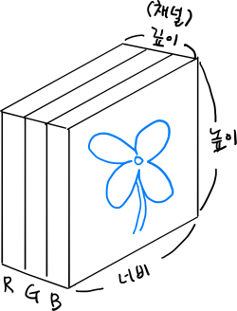

In [ ]:
# 깊이가 있는 입력에서 합성곱을 수행하기 위해서는 도장도 깊이가 필요합니다.
# 즉 커널의 크기가 (3,3)이 아니라 (3,3,3)이 됨

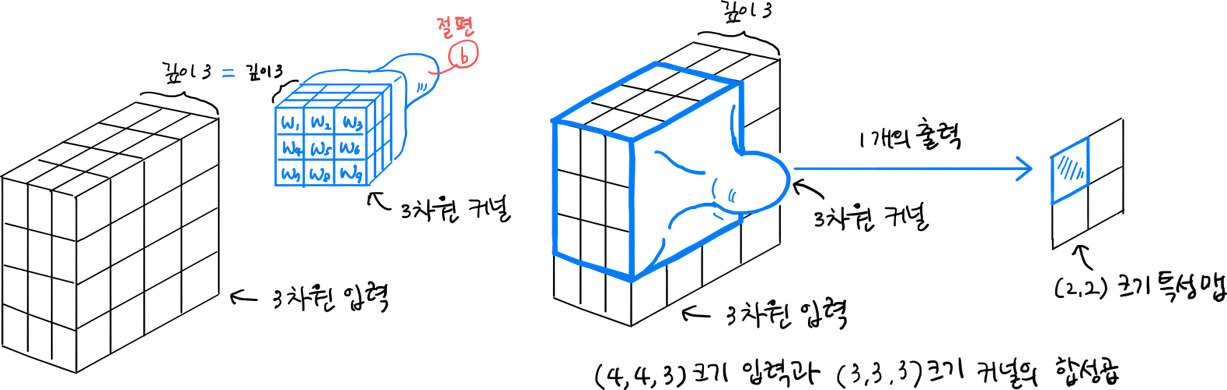

In [ ]:
# 커널 배열의 깊이는 항상 입력의 깊이와 같다.
# 합성곱의 계산은 (3,3,3) 영역에 해당하는 27개의 원소에 27개의 가중치를 곱하고 절편을 더하는 식
# 기본적으로 2차원 합성곱과 같지만 도장이 입력의 깊이만큼 쑥 들어간다고 생각해봄
# 결론은 입력이나 필터의 차원이 몇개인지 상관없이 항상 출력은 하나의 값(특성 맵에 있는 한 원소가 채워짐)

# 케라스의 합성곱 층은 원래 3차원 입력을 준비한다.
# (우리가 흑백이미지인 MNIST를 예제로 사용해서 그렇지 원래는 모두 컬러)
# (28,28,1) 크기의 3차원 배열로 변환 (원소 개수는 동일하면서 차원만 맞춤)

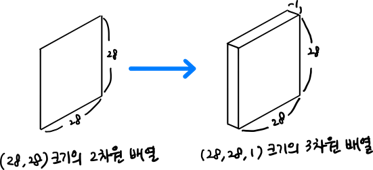

In [ ]:
# 이와 비슷한 경우는 합성곱 층-풀링 층 다음에 다시 또 합성곱 층이 올때
# 첫번째 합성곱 층의 필터 개수가 5개라고 가정하여 첫 번째 풀링 층을 통과한 특성 맵의 크기가 (4,4,5)라고 했을 때
# 두번째 합성곱 층에서 필터의 너비와 높이가 각각 3이라면 이 필터의 커널 크기는(3,3,5) 가됨
# 이유 : 입력의 깊이와 필터의 깊이는 같아야 함 ( 3 * 3 * 5 = 45 개의 가중치를 곱하고 절편을 더함)
#        -> 합성곱의 결과는 1개의 출력

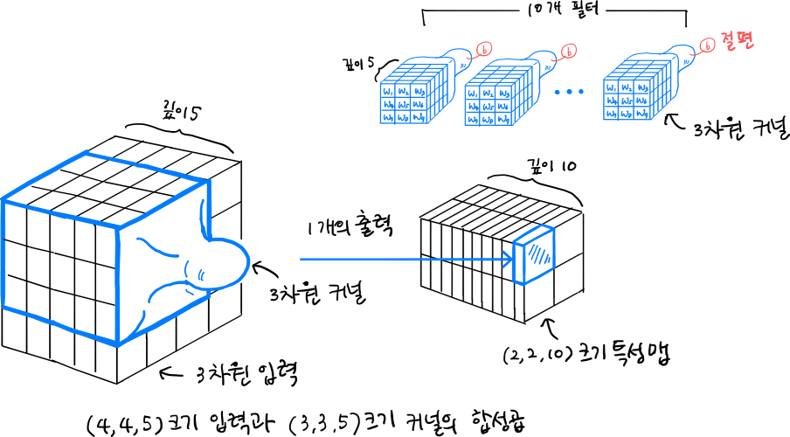

In [ ]:
# 두 번째 합성곱 층의 필터 개수가 10개라면 만들어진 특성 맵의 크기는 (2,2,10)이 됨
# 이렇게 합성곱 신경망은 너비와 높이는 점점 줄어들고 깊이는 점점 깊어지는 것이 특징
# 마지막에 출력층 전에 특성 맵을 모두 펼쳐서 밀집층의 입력으로 사용

# 합성곱 신경망에서 필터는 이미지에 있는 어떤 특징을 찾는다
# 처음에는 간단한 기본적인 특징(직선,곡선 등)을 찾고 층이
# 깊어질 수록 다양하고 구체적인 특징을 감치할 수 있도록 필터의 개수를 늘림

# 또 어떤 특징이 이미지의 어느 위치에 놓이더라도 쉽게 감지할 수 있도록 너비와 높이 차원을
# 점점 줄여가는 것이 합성곱 신경망의 목표임

In [ ]:
# 합성곱 신경망을 사용한 이미지 분류 실습

# 전에 배운 합성곱, 필터, 패딩, 스트라이드, 풀링 등은 직접 계산할 필요가 없다.
# 케라스 API가 알아서 한다. 그러나 개념과 돌아가는 기능에 대한 느낌을 알아야 최적의 결과를 얻을 수 있다.
# 그래서 동작원리를 터득하고 특히 다른 신경망 구조를 만나도 잘 적응할 수 있다.

# 패션 MNIST를 활용하여 응용 해본다.
# 전처리 : 데이터 스케일을 0~255 사이에서 0~1 사이로 바꾸고 훈련 세트와 검증 세트로 나눔
# 차이점은 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 한다.
#   (넘파이 reshape(), Flatten 사용) 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 할 필요가 없다.
#   입력이미지는 항상 깊이(채널) 차원이 이 있어야 함

# 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D 층을 사용하기 위해
# 마지막에 이 채널 차원을 추가해야 함
# 넘파이 reshape() 메서드를 이용해 전체 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가함.

In [3]:
import tensorflow as tf
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
tf.keras.utils.set_random_seed(42)

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() # 패션 MNIST 데이터 불러오기

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# train_input(48000,28,28) -> train_scaled(48000,28,28,1)로 4차원 변경 됨

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
# 훈련 데이터, 검증 데이터, 훈련타겟, 검증타켓 -> 8:2

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

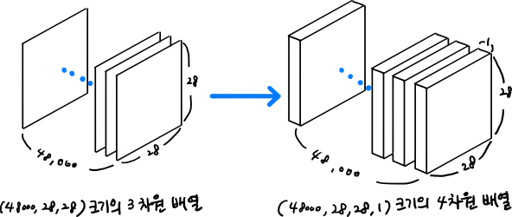

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# 32개의 3x3 필터(커널) 로 same 패딩

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.add(keras.layers.MaxPooling2D(2))
# 2x2 의 MaxPooling

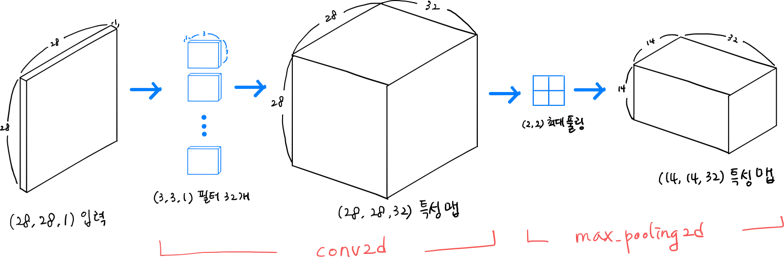

In [7]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

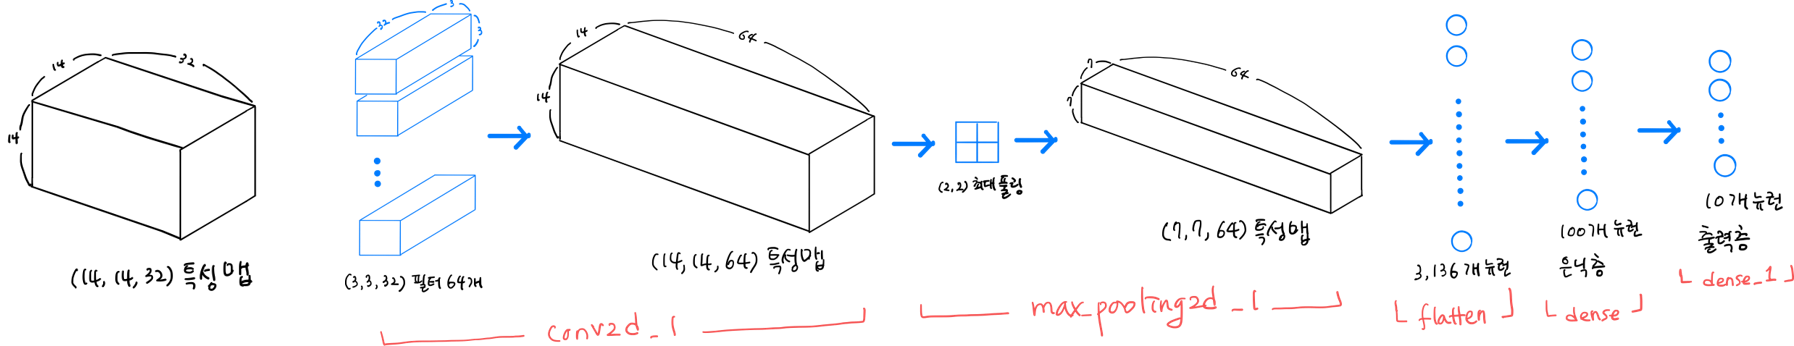

In [8]:
model.summary() # 2번 반복 결과로 (보통 2~5번 적용) 7x7x64 의 특성맵 생성됨

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3차원 특성 맵을 일렬로 펼칠 차례임
# -> 마지막에 10개의 뉴런을 가진 밀집 층에서 확률을 계산
# 이번에는 특성맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고
# 중간에 하나의 밀집 은닉층을 하나 추가함
# Flatten -> Dense 은닉층 -> Dropout -> Dense 출력층
# 은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱과 같은 렐루 사용
# 드롭아웃을 이용해 은닉층의 과대적합을 막아 성능을 조금 개선
# 패션 MNIST는 클래스를 10개로 분류하는 다중 분류 문제임으로 활성화 함수는 소프트맥스 사용

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 완전 신경망에서 해던 것 처럼 모델 파라미터 개수는 첫번째 합성곱 층은
# 32개의 필터를 가지고 있고 크기가 (3,3,) 깊이가 1이고 필터마다 1의 절편이 있음
# 3 * 3 (필터크기) * 1 (깊이) * 32 (필터개수) + 32 (필터개수, 절편부분)= 320의 파라미터

# 두번째 합성곱 층은 64개의 필터를 사용하게 크기가 (3,3,)
# 깊이가 32 이고 필터마다 1의 절편이 있음
# 3 * 3 * 32 * 64 + 64 = 18496의 파라미터

# Flatten 클래스의 (7,7,64) 크기의 특성 맵을 1차원 배열로 펼치면
# (3136,)의 크기의 배열이 됨 이를 100개의 뉴런과 완전히 연결해야 함으로
# 은닉층의 모델 파라미터 개수 -> 3136 * 100 + 100 = 313700의 파라미터

# 마지막 출력층의 모델 파라미터 개수는 1010개

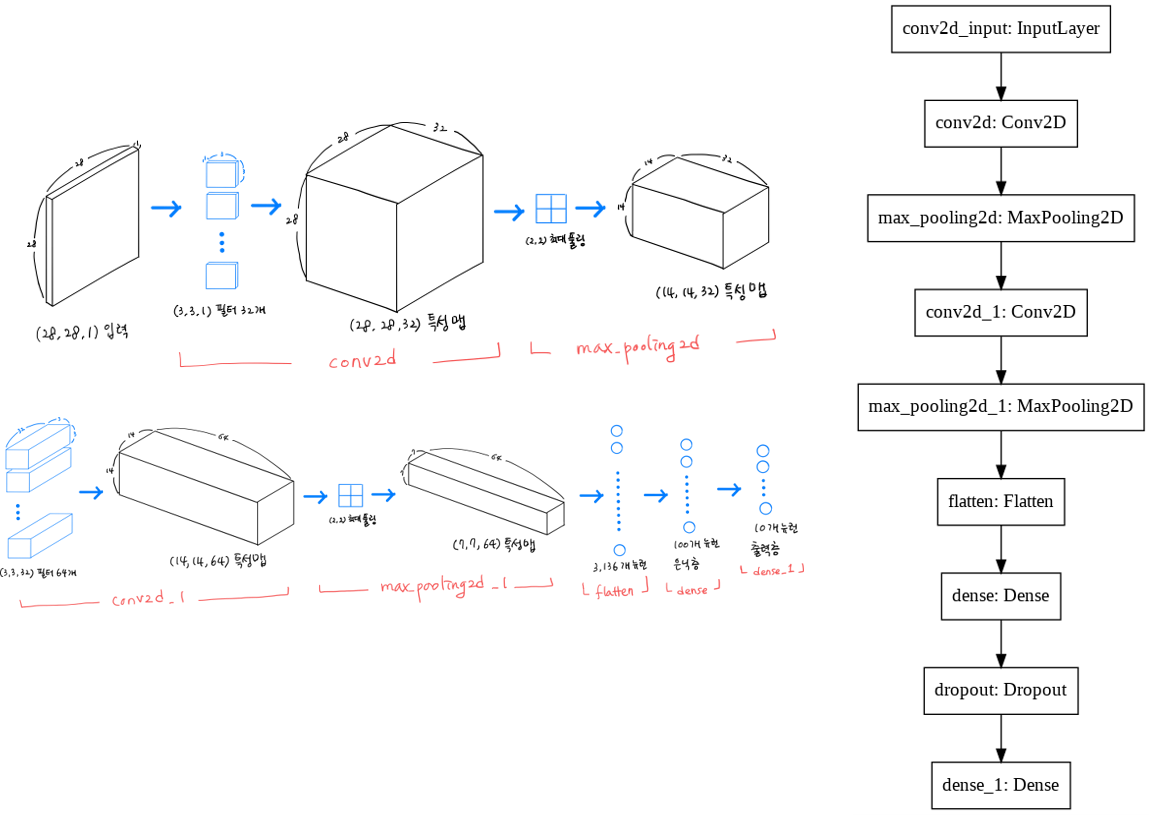

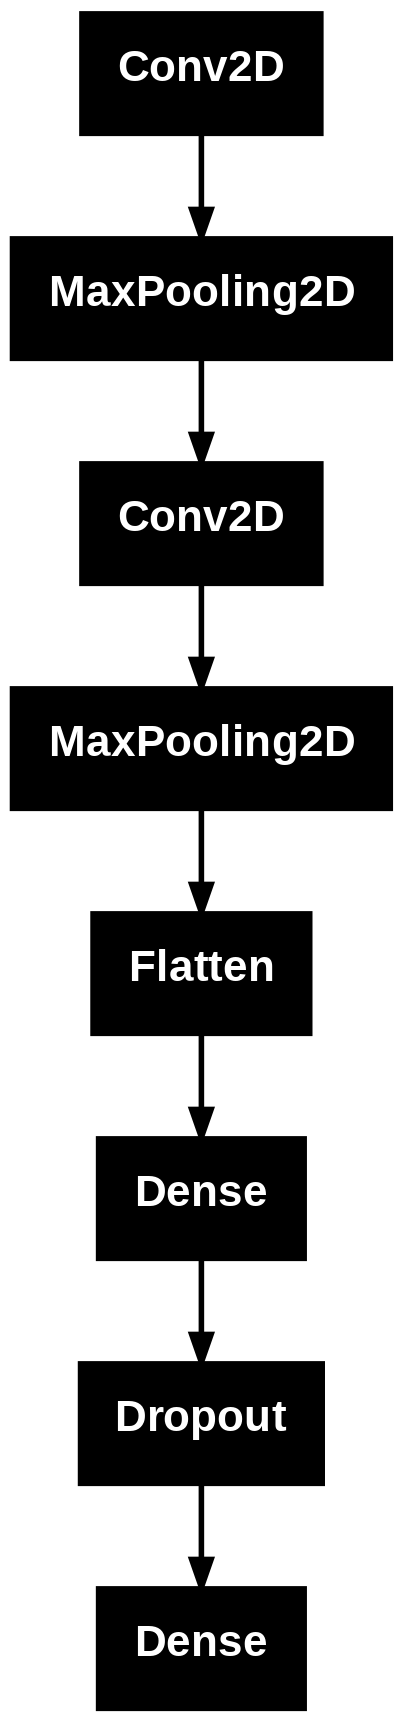

In [13]:
# 케라스는 층의 구성을 그림으로 보여주는 메서드가 있다.  (keras.utils.plot_model)
keras.utils.plot_model(model) # 버전차이

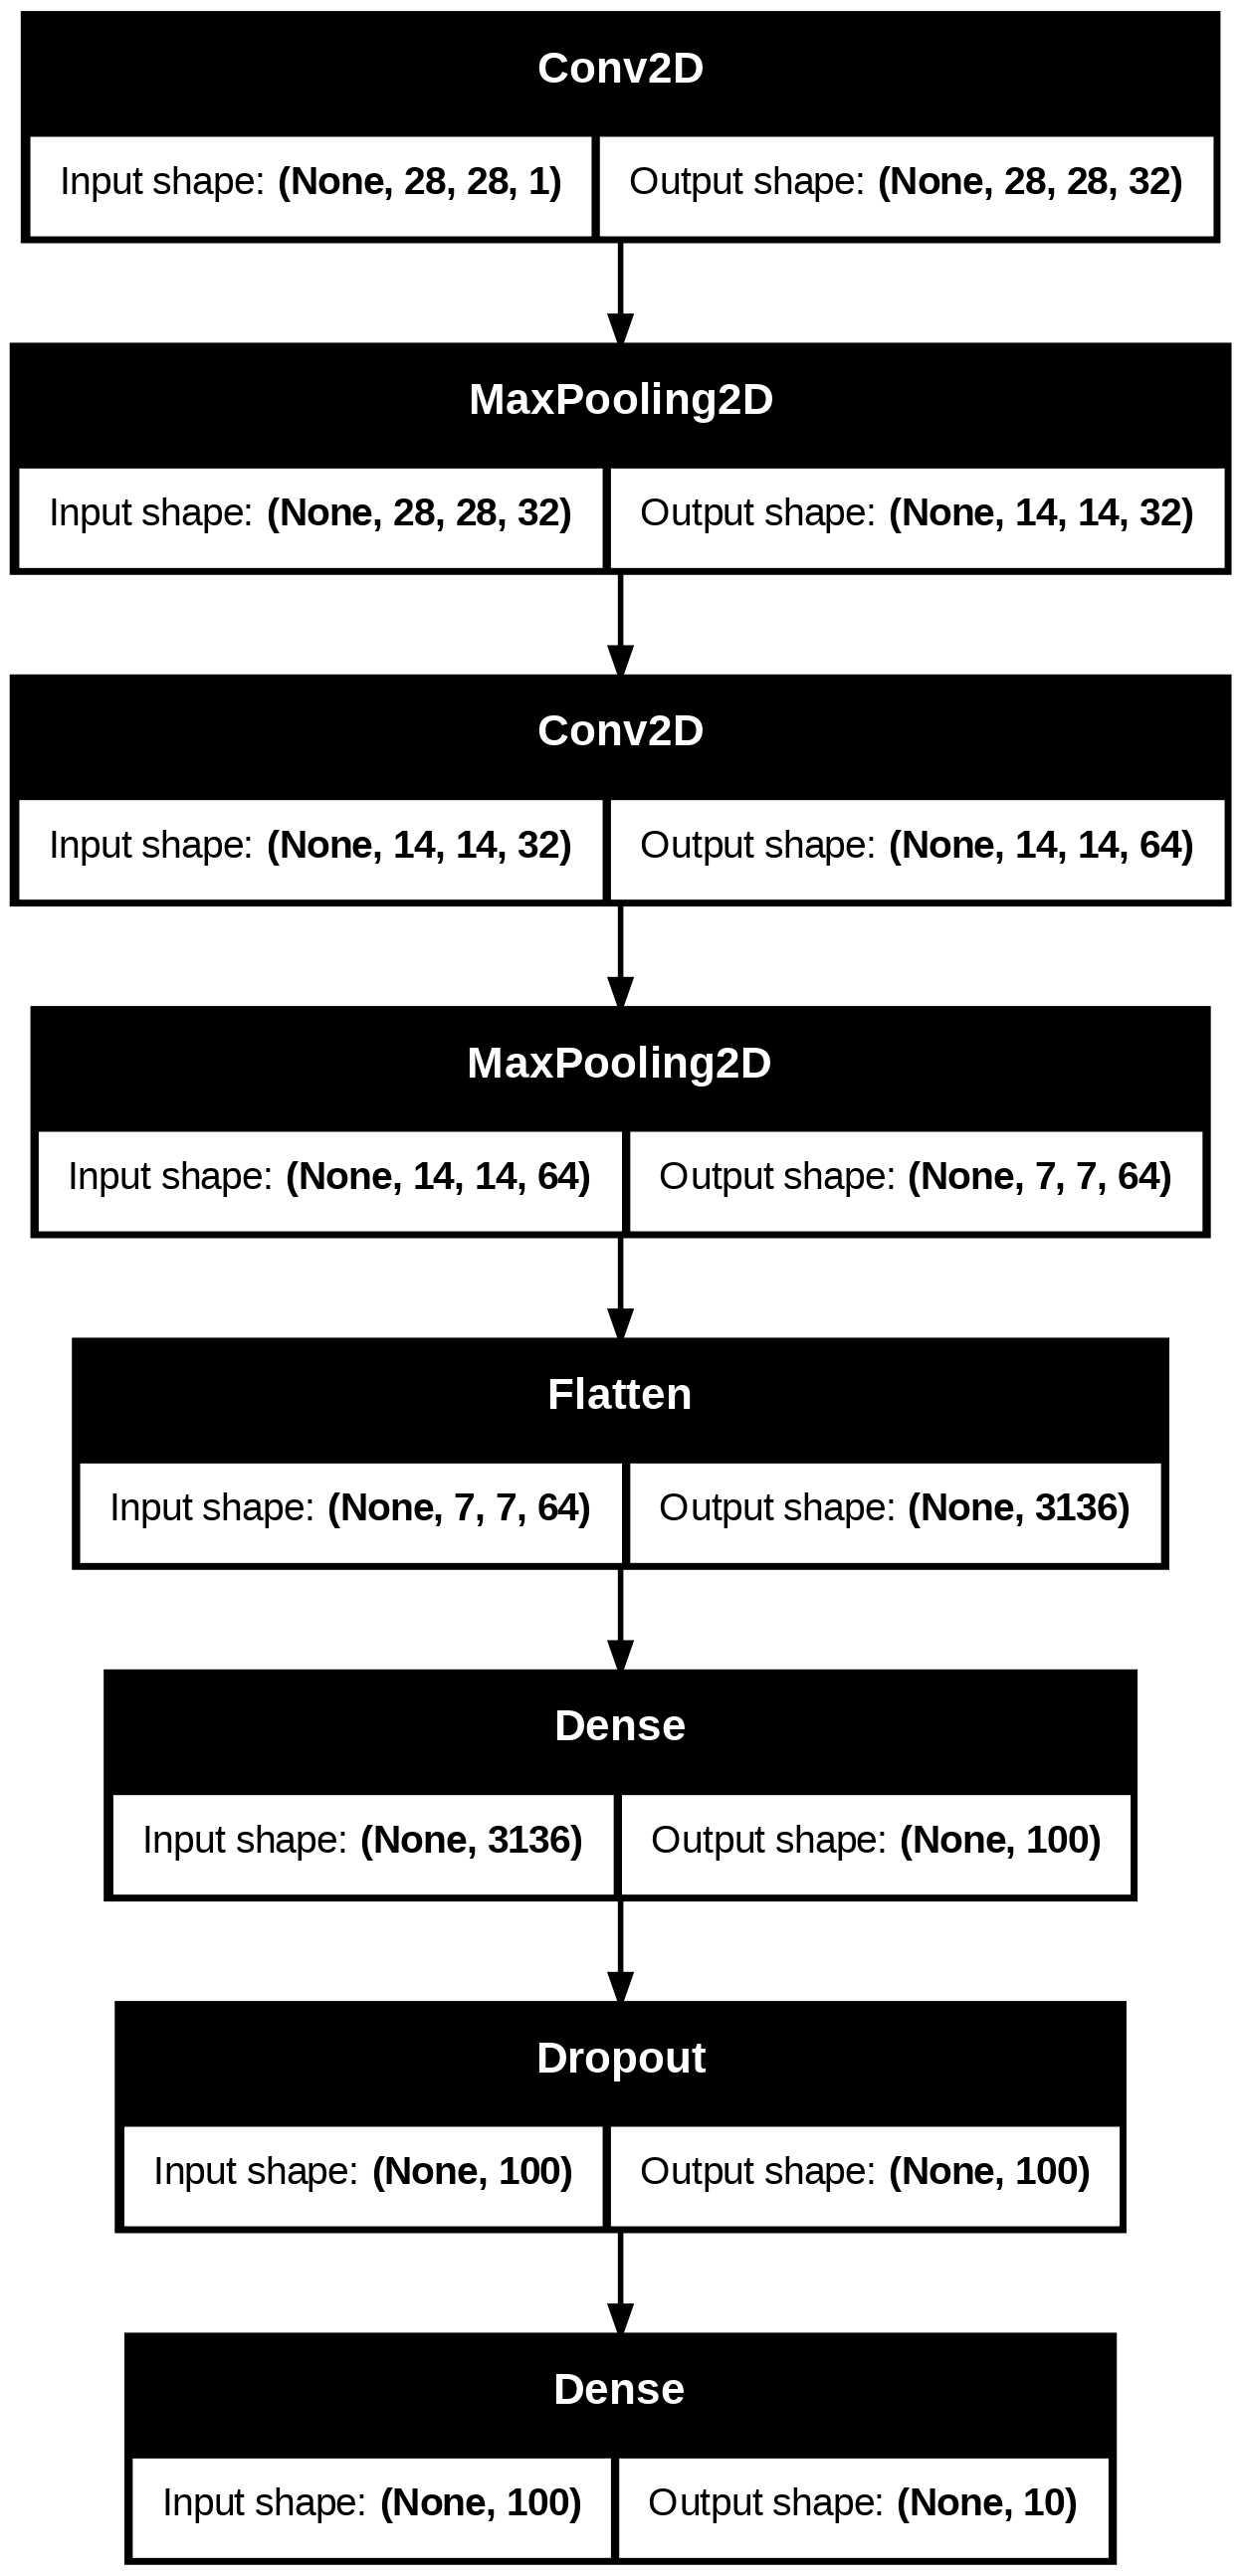

In [14]:
keras.utils.plot_model(model, show_shapes=True) # 입력과 출력 크기를 표시

In [15]:
# 패션 MNIST 데이터에 적용할 합성곱 신경망 모델의 구성 끝 -> 컴파일하고 훈련 진행 시작!

# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 아담 최적화로 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
# ModelCheckpoint 콜백 조기종료 -> 검증이 2번 정도 상향시 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
# EarlyStopping 콜백 조기 종료
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.7404 - loss: 0.7266 - val_accuracy: 0.8796 - val_loss: 0.3285
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.8685 - loss: 0.3690 - val_accuracy: 0.8953 - val_loss: 0.2860
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.8871 - loss: 0.3127 - val_accuracy: 0.9006 - val_loss: 0.2660
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.8970 - loss: 0.2795 - val_accuracy: 0.9122 - val_loss: 0.2424
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9053 - loss: 0.2579 - val_accuracy: 0.9136 - val_loss: 0.2411
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9134 - loss: 0.2326 - val_accuracy: 0.9166 - val_loss: 0.2324
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9170 - loss: 0.2186 - val_accuracy: 0.9133 - val_loss: 0.2505
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9276 -

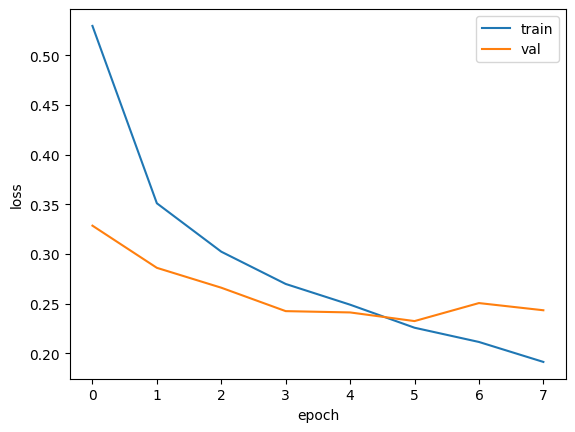

In [16]:
# 손실 그래프를 그려서 조기 종료가 잘 이루어 졌는지 확인해 보자.

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 검증 세트에 대한 손실이 점차 감소하다 정체되기 시작하고
# 훈련 세트에 대한 손실은 점점 낮아짐
# 이 그래프를 기반으로 6번째 에포크를 최적으로 생각할 수 있음
# 결과는 학생마다 다를 수 있음

In [17]:
# EarlyStopping 클래스에서 restore_best_weights=True로 지정해서
# 현재 model 객체가 최적의 모델 파라미터로 복원됨
# ModelCheckpoint 콜백이 저장한 best-cnn-model.keras 파일을 다시 읽을 필요가 없음

# 이번 세트에 대한 성능 평가 진행
model.evaluate(val_scaled, val_target)
# 이 결과는 fit() 메서드의 출력 중 다섯번째 출력과 비슷함
# EarlyStopping 콜백이 model 객체의 최상의 모델 파라미터로 잘 복원 함

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9204 - loss: 0.2248


[0.23237931728363037, 0.9165833592414856]

In [18]:
# 맨 처음 떼어 놓았던 테스트 세트로 합성곱 신경망의 일반화 성능을 파악해보자.
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
# 훈련세트와 검증 세트에서 했던 것 처럼 픽셀 값의 범위를
# 0~1 사이로 바꾸고 이미지 크기를 (28,28,1)로 변경

In [19]:
model.evaluate(test_scaled, test_target)
# 테스트 세트에서 점수는 검증 세트보다 조금 작음
# 이 모델을 실전에 투입하면 90% 이상의 성능을 기대할 수 있음

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9111 - loss: 0.2646


[0.25571832060813904, 0.9108999967575073]

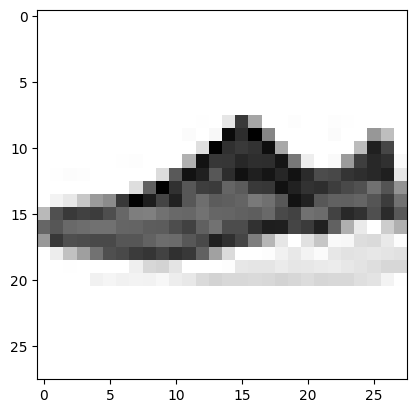

In [20]:
# 편의상 검증 세트의 첫 번째 샘플인 이미지를 활용 해보자.
# 팻플롯립에서 흑백 이미지에 깊이 차원은 없다 -> (28,28,1) 크기를 (28,28)로 변경 reshape(28, 28)
plt.imshow(val_scaled[2].reshape(28, 28), cmap='gray_r')
# 세 번째 샘플인 val_scaled[0]
plt.show()

In [21]:
preds = model.predict(val_scaled[2:3])
print(preds)
# 티셔츠, 바지, 스웨터, 드레스, 코트, 샌달, 셔츠, 스니커즈, 가방, 앵클 부츠
# 3번째 샘플은 8번째(스니커즈)로 예측됨

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[3.02382494e-11 3.91127316e-13 2.27870294e-13 2.55342351e-13
  2.30960520e-12 5.25601394e-08 1.19151162e-12 9.99997020e-01
  1.42051015e-11 2.99313342e-06]]


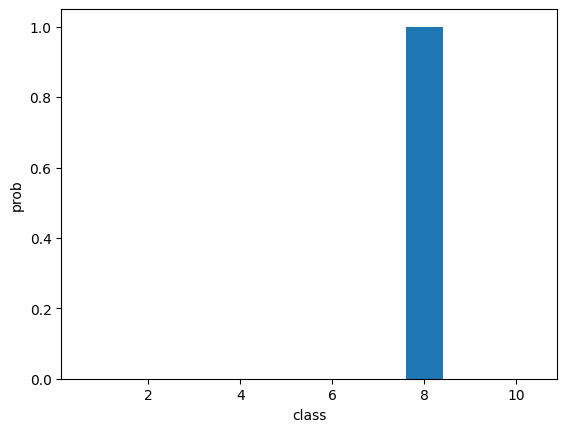

In [27]:
# 보기 쉽게...
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [26]:
import numpy as np

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(preds)])

스니커즈
